<a href="https://colab.research.google.com/github/Prasun1608/Machine-Learning-Projects/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport    

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout


from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout, Embedding
from keras.activations import relu, sigmoid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler


Importing The Data


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Wine Quality/winequality-white.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.isnull().sum()   #Check if data has any null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data= data.sample(frac=1)    #This is to simply shuffle the whole dataset so to avoid any ordering in data.
data.reset_index(inplace=True)   

In [ ]:
from pandas_profiling import ProfileReport    
report= ProfileReport(data)    #Creating Pandas Profiling report


In [ ]:
report

Number of variables,13
Number of observations,4898
Total Missing (%),0.0%
Total size in memory,497.5 KiB
Average record size in memory,104.0 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [ ]:
#The above report shpows that all variables here 13 valriables of our intrest are of numerical Type. So we dont need an encoder to encode them.
#Also, quality vaible (which is of our intrest) has high positive correlation with alcholol and PH.


In [ ]:
#Lets play around the data a little bit 
#None of the wines have quality as 0,1 and 2. ie none are so poorly rated

data.groupby('quality')['alcohol', 'pH'].mean()

#Wines of high quality have highest average content of alcohol and ph

,alcohol,pH
quality,,
3,10.345000,3.187500
4,10.152454,3.182883
5,9.808840,3.168833
6,10.575372,3.188599
7,11.367936,3.213898
8,11.636000,3.218686
9,12.180000,3.308000


In [ ]:
#Splitting the Predictors and Predictor variables. Here our target variable is Quality.

y= data['quality']
x=data.drop('quality', axis=1)

In [ ]:
data.drop('index', axis=1, inplace=True)

In [ ]:
#As mean and other statistics of data points vary significantly, we use MinMaxScaler to sacle them all to a common range of 0 to 1. 
#Also, robust scaler is not used as data does nit give any significant indication of presence of outliers.

sc= MinMaxScaler()
x= sc.fit_transform(x)

In [ ]:
x

array([[0.12334082, 0.24038462, 0.17647059, ..., 0.24545455, 0.45348837,
        0.29032258],
       [0.44639575, 0.25961538, 0.30392157, ..., 0.32727273, 0.36046512,
        0.24193548],
       [0.67245252, 0.28846154, 0.08823529, ..., 0.17272727, 0.40697674,
        0.64516129],
       ...,
       [0.60036757, 0.31730769, 0.20588235, ..., 0.44545455, 0.20930233,
        0.43548387],
       [0.77680212, 0.41346154, 0.11764706, ..., 0.24545455, 0.59302326,
        0.37096774],
       [0.43434756, 0.50961538, 0.24509804, ..., 0.34545455, 0.55813953,
        0.24193548]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=1)    #Train and test split

**Buliding Different Models**


In [ ]:
#Building a Random Forest Model

model1= RandomForestClassifier(n_estimators=200,criterion= 'gini' , min_samples_split=4, verbose=1)  

#n_estimators= no of trees in the classifier
#criterion= 'gini' means use gini index for measuring the imurity of the node. Other one available is entropy
#min_samples_split: Min no of samples in the node to split it


model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


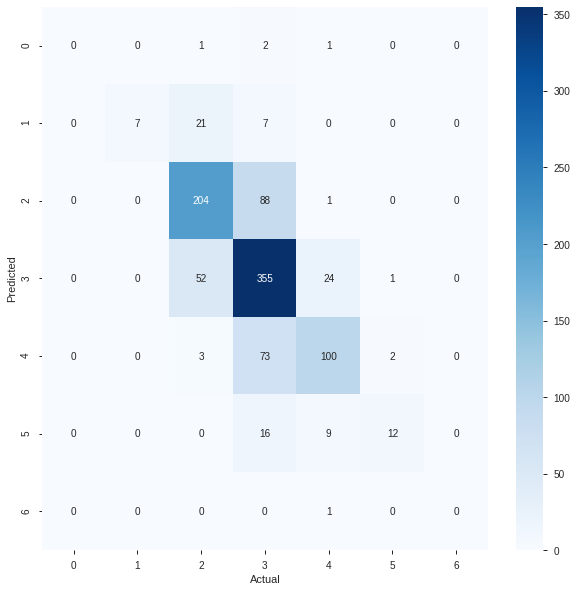

In [ ]:
cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

#This confusion matrix clearly shows what all values are coreectly labelled for each instance and if wrongly labelled, what is the wrongly classified category.

In [ ]:
print(classification_report(y_test, y_pred))

#The model gives only 70% accuracy

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.20      0.33        35
           5       0.73      0.70      0.71       293
           6       0.66      0.82      0.73       432
           7       0.74      0.56      0.64       178
           8       0.80      0.32      0.46        37
           9       0.00      0.00      0.00         1

    accuracy                           0.69       980
   macro avg       0.56      0.37      0.41       980
weighted avg       0.71      0.69      0.68       980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


quality                 10.762017
pH                       9.570323
fixed acidity            9.519116
citric acid              9.211522
total sulfur dioxide     8.757147
density                  8.126935
chlorides                8.058741
free sulfur dioxide      7.709633
sulphates                7.394877
alcohol                  7.249455
residual sugar           7.016100
volatile acidity         6.624134
dtype: float64


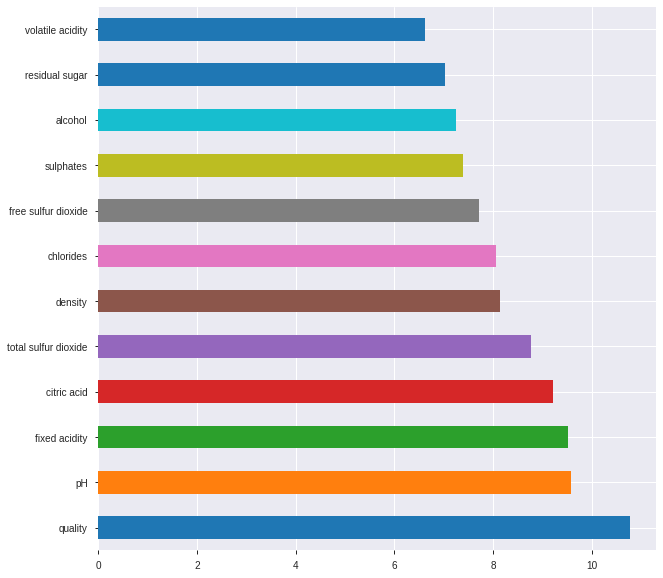

In [ ]:
#Finding which features played an important role in determining

feat_importances = pd.Series(model1.feature_importances_*100, index=data.columns[:len(data.columns)])
feat_importances.sort_values(inplace=True, ascending=False)
print(feat_importances)

feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
#As evident, Quality and PH plays the most important role in Prediction/Classification.

      Iter       Train Loss   Remaining Time 
         1        4993.7106           15.93s
         2        4969.8366           16.07s
         3        4947.4587           15.85s
         4        4926.2187           15.55s
         5        4905.5844           15.30s
         6        4885.9896           15.22s
         7        4867.0182           15.04s
         8        4848.7850           14.97s
         9        4831.0444           14.92s
        10        4813.7833           14.84s
        20        4664.7178           13.88s
        30        4545.0603           13.12s
        40        4444.8939           12.44s
        50        4359.3677           11.71s
        60        4285.0045           10.93s
        70        4220.4570           10.16s
        80        4162.0569            9.38s
        90        4102.9393            8.58s
       100        4054.2924            7.80s
       200        3727.8546            0.00s


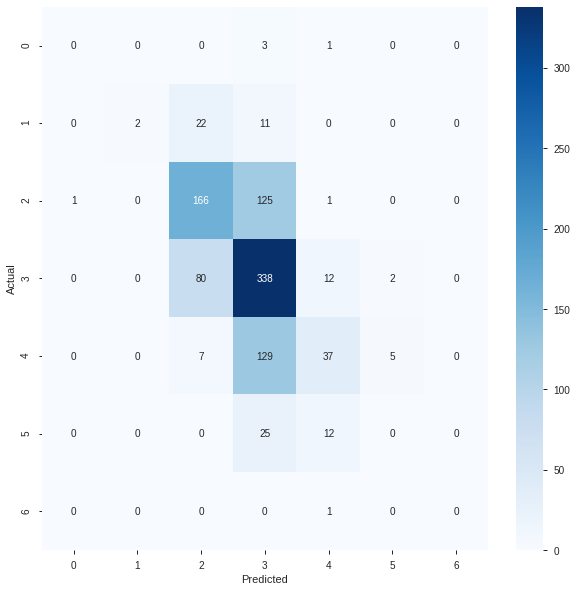

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.06      0.11        35
           5       0.60      0.57      0.58       293
           6       0.54      0.78      0.64       432
           7       0.58      0.21      0.31       178
           8       0.00      0.00      0.00        37
           9       0.00      0.00      0.00         1

    accuracy                           0.55       980
   macro avg       0.39      0.23      0.23       980
weighted avg       0.56      0.55      0.51       980

quality                 11.025447
pH                       9.734494
fixed acidity            9.196604
citric acid              9.141765
total sulfur dioxide     8.529680
density                  8.237899
chlorides                7.945924
free sulfur dioxide      7.818813
sulphates                7.684402
alcohol                  7.118672
residual sugar           7.028509
volatile acidity         6.53

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


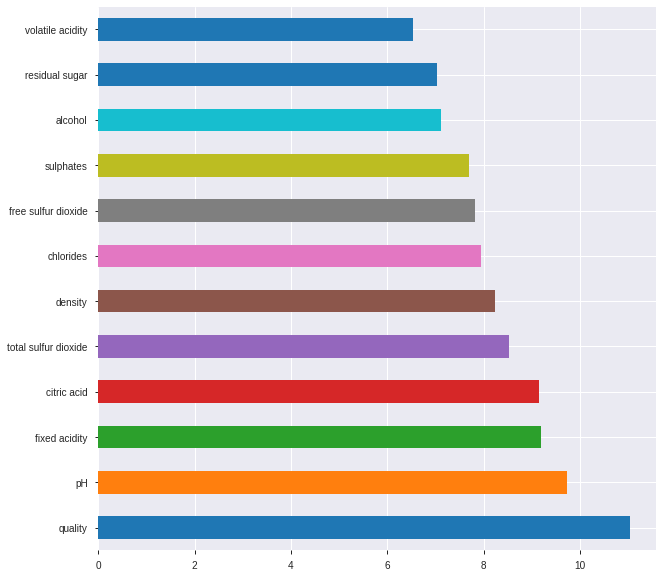

In [ ]:
#Lets use XGBoost Classifier

model2= GradientBoostingClassifier(learning_rate=0.01,n_estimators=200, min_samples_split=4,verbose=1)

#n_estimators: The number of boosting stages to perform. 


model2.fit(x_train, y_train)
y_pred= model2.predict(x_test)

cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

print(classification_report(y_test, y_pred))


feat_importances = pd.Series(model1.feature_importances_*100, index=data.columns[:len(data.columns)])
feat_importances.sort_values(inplace=True, ascending=False)
print(feat_importances)

feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))


In [ ]:
#Here accuracy has further fallen down to just 55% as seen from the classification report

In [ ]:
#Lets try a Neural Network implementation for it

In [ ]:
model= Sequential()
model.add(Dense(64, activation='relu', input_shape=(12,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
y_train1= np.array(y_train)  #as keras layers uses numpy array

new= pd.get_dummies(y_train)  #This encodes y as one hot vectors for each row 
new['0']= 0
new['1']=0
new['2']=0
y1= new.values   #These 0,1,2 are added because they are not present in any of the original sample and need to be accounted for 

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train, y1, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
196/196 [==============================] - 1s 4ms/step - loss: 1.5401 - accuracy: 0.4351 - val_loss: 1.1548 - val_accuracy: 0.5089
Epoch 2/100
196/196 [==============================] - 0s 2ms/step - loss: 1.1477 - accuracy: 0.5179 - val_loss: 1.1226 - val_accuracy: 0.5013
Epoch 3/100
196/196 [==============================] - 0s 2ms/step - loss: 1.1314 - accuracy: 0.5268 - val_loss: 1.1116 - val_accuracy: 0.5077
Epoch 4/100
196/196 [==============================] - 0s 2ms/step - loss: 1.1123 - accuracy: 0.5325 - val_loss: 1.0995 - val_accuracy: 0.5268
Epoch 5/100
196/196 [==============================] - 0s 2ms/step - loss: 1.1111 - accuracy: 0.5332 - val_loss: 1.0924 - val_accuracy: 0.5268
Epoch 6/100
196/196 [==============================] - 0s 2ms/step - loss: 1.0930 - accuracy: 0.5354 - val_loss: 1.0597 - val_accuracy: 0.5395
Epoch 7/100
196/196 [==============================] - 0s 2ms/step - loss: 1.0857 - accuracy: 0.5315 - val_loss: 1.0581 - val_accuracy: 0.5446

Text(0.5, 1.0, 'Model Loss V/s Validation Loss')

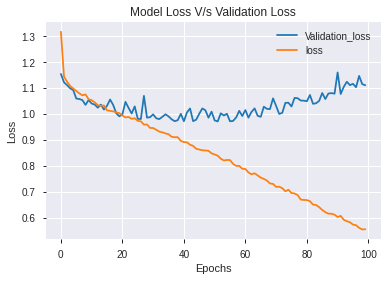

In [ ]:
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss V/s Validation Loss')

#As model overall loss decreases , it is better to run/ train on more epochs for better accuracy.

Text(0.5, 1.0, 'Model Accuracy V/s Validation Accuracy')

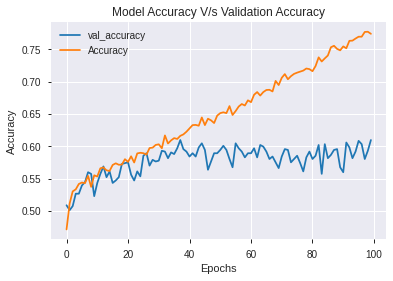

In [ ]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy V/s Validation Accuracy')

#As model overall Accuracy increases , it is better to run/ train on more epochs for better accuracy.

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
y_pred1=[]

for i in range(len(y_pred)):
  y_pred1.append(np.argmax(y_pred[i]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.25      0.00         4
           4       0.01      0.03      0.01        35
           5       0.00      0.00      0.00       293
           6       0.00      0.00      0.00       432
           7       0.00      0.00      0.00       178
           8       0.00      0.00      0.00        37
           9       0.00      0.00      0.00         1

    accuracy                           0.00       980
   macro avg       0.00      0.03      0.00       980
weighted avg       0.00      0.00      0.00       980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


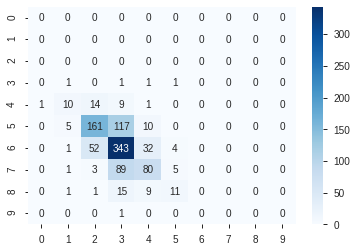

In [ ]:
cm= confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

In [ ]:
#Not very accurate

In [ ]:
#Using KNN neighbours
#as these individual classifications are not govong that much accuracy, we classify them into broad ranges first

wine_cat=[]

for i in data['quality']:
  if i>=7:
    wine_cat.append(1)
  else:
    wine_cat.append(0)

  

In [ ]:
data['wine_cat']= wine_cat
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_cat
0,6.3,0.26,0.49,1.5,0.052,34.0,134.0,0.99240,2.99,0.61,9.8,6,0
1,6.5,0.39,0.81,1.2,0.217,14.0,74.0,0.99360,3.08,0.53,9.5,5,0
2,6.8,0.17,0.35,1.8,0.040,29.0,84.0,0.98961,2.91,0.57,12.0,7,1
3,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1
4,6.0,0.33,0.26,5.1,0.051,16.0,119.0,0.99416,3.15,0.41,9.2,5,0


In [ ]:
y= data['wine_cat']
x=data.drop(['quality', 'wine_cat'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [ ]:
model= KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
grid= {'n_neighbors':[5,6,7,8,9], 'leaf_size':[1,2,3,4,5], 'weights':['uniform', 'distance']}


model1= GridSearchCV(model, grid)
model1.fit(x_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5],
                         'n_neighbors': [5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model= model1.best_estimator_

In [ ]:
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       764
           1       0.60      0.25      0.35       216

    accuracy                           0.80       980
   macro avg       0.71      0.60      0.62       980
weighted avg       0.77      0.80      0.76       980



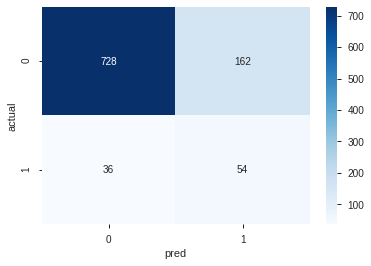

In [ ]:
cm= confusion_matrix(y_pred, y_test)
cm

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('pred')
plt.ylabel('actual')

print(classification_report(y_test, y_pred))


#This gives 84% accuracy Very good than previous ones

In [ ]:
tp= 113  #True Positive
fp= 115  #False Positive
fn=37    #False Negative
tn=715   #True Negative


precision= tp/(tp+fp)
recall= tp/(tp+fn)

f1= 2*((precision*recall)/(precision+recall))
print(f1)

#Here f1 score is a better measure which is 60% which is quite good
#But here accuracy is 80%.

0.5978835978835979


In [ ]:
#Implementation of Neural Networks using GridSearchCV

def create_model(layers, activation):
  model=Sequential()
  for i, nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes, input_dim= x_train.shape[1] )) 
      model.add(Activation(activation))
    
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
    
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return (model)

model= KerasClassifier(build_fn=create_model, verbose=1)



In [ ]:
layers=[(20), (40,20), (45,30,15)]
activations=('sigmoid', 'relu')

param_grid= dict(layers=layers, activation=activations, batch_size=[128,256], epochs=[10])

grid= GridSearchCV(estimator=model, param_grid= param_grid)

grid_result= grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 3.3190 - accuracy: 0.7848
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 3.2429 - accuracy: 0.7898
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 3.2281 - accuracy: 0.7907
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 3.1789 - accuracy: 0.7939
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 3.4084 - accuracy: 0.7790
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 3.1988 - accuracy: 0.7926
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 3.3578 - accuracy: 0.7823
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 3.2611 - accuracy: 0.7886
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 3.5073 - accuracy: 0.7726
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 3.2660 - accuracy: 0.7883
Epoch 1/10
25/25 [===

In [ ]:
[grid_result.best_score_, grid_result.best_params_]

[0.8070402264595031,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 10,
  'layers': (45, 30, 15)}]

In [ ]:
pred_y= grid.predict(x_test)
pred_y

predicted= pred_y>0.5
predicted

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted)
cm

score= accuracy_score(y_test, predicted)
score



8/8 [==============================] - 0s 2ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7846938775510204

In [ ]:
#Here we are getting 78% accuracy which is preety good in this context.

In [ ]:
#The best job is done by K nearest Neighbrs whith 80% accuracy and followed by a Dense Neural Netwrok with accuracy of 78%. 
#This is followed by a Random Forest Classifier which gives almost the same accuracy of around 70%.